# **Image labeling on social network metadata**

**Package import**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


**Dataset import**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Movies-Poster_Dataset-master/train.csv')
data.shape

(10, 27)

**Tags overview**

In [ ]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Processing images in batch**

In [ ]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/drive/MyDrive/Movies-Poster_Dataset-master/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


In [ ]:
X.shape

(10, 350, 350, 3)

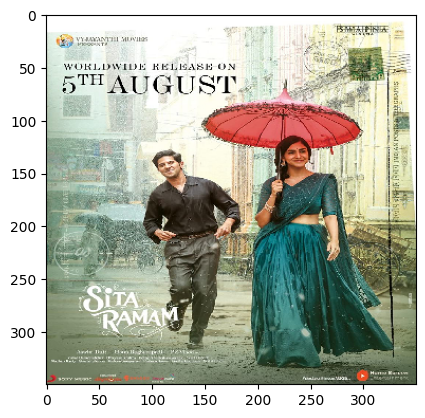

In [ ]:
plt.imshow(X[1])

**Labelling image**

In [ ]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [ ]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(10, 25)

**Splitting dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [ ]:
X_train[0].shape

(350, 350, 3)

**Building CNN network**

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

**Parameter summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 348, 348, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 172, 172, 32)     1

**Training dataset**

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 0.8828 - accuracy: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 1.0501 - accuracy: 0.0000e+00 - val_loss: 0.6877 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 0.9229 - accuracy: 0.0000e+00 - val_loss: 0.6806 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 0.9467 - accuracy: 0.0000e+00 - val_loss: 0.6739 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 0.8569 - accuracy: 0.1250 - val_loss: 0.6709 - val_accuracy: 0.0000e+00


**Plot for training and validation loss**

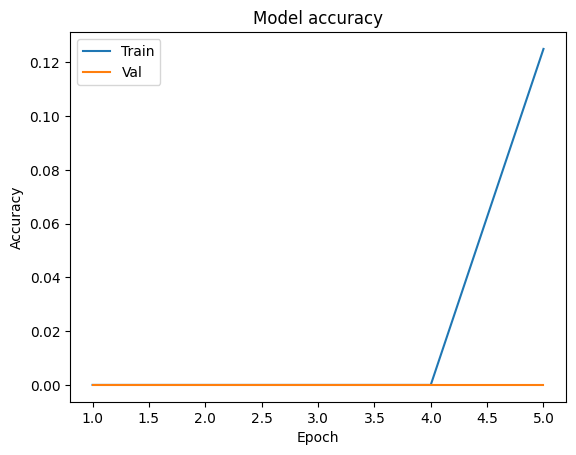

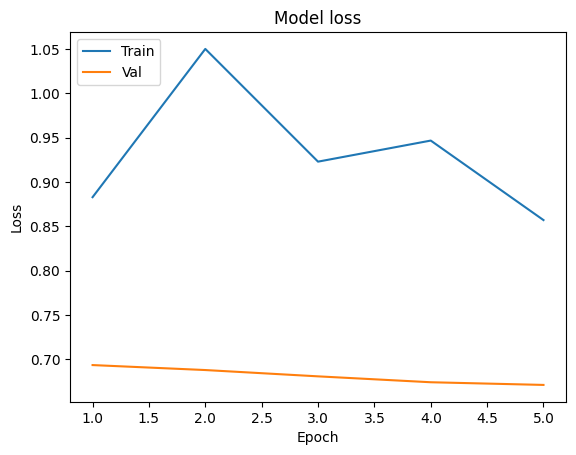

In [ ]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)

**Image labelling on sample movie poster**

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
1/1 [==============================] - 0s 72ms/step
Horror
Musical
Sci-Fi


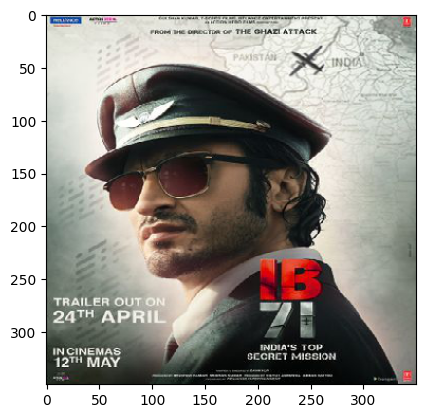

In [ ]:
img = image.load_img('IB71.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])